In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt

In [27]:
df = pd.read_csv(r'C:\Users\shuca\OneDrive\Desktop\All files\healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [28]:
df.groupby('Name').aggregate({'Age':'mean', 'Billing Amount':'min'})

,Age,Billing Amount
Name,,
Aaron Burnett,54.0,7531.642746
Aaron Calderon,35.0,47555.486731
Aaron Coleman,69.0,46762.663205
Aaron Daugherty,34.0,30468.487108
Aaron Davis,22.0,17930.743019
...,...,...
Zachary Wood,36.0,7154.956700
Zachary Yates,37.0,5937.256092
Zoe Adkins DVM,30.0,13133.514334


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

# Veriye genel bakis

In [5]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
df.size

150000

In [7]:
df.shape

(10000, 15)

In [8]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [9]:
#checking unique values for each column
df.nunique()

Name                   9378
Age                      68
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1815
Doctor                 9416
Hospital               8639
Insurance Provider        5
Billing Amount        10000
Room Number             400
Admission Type            3
Discharge Date         1834
Medication                5
Test Results              3
dtype: int64

In [10]:
## barplot gender
df['Gender'].value_counts()

Female    5075
Male      4925
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

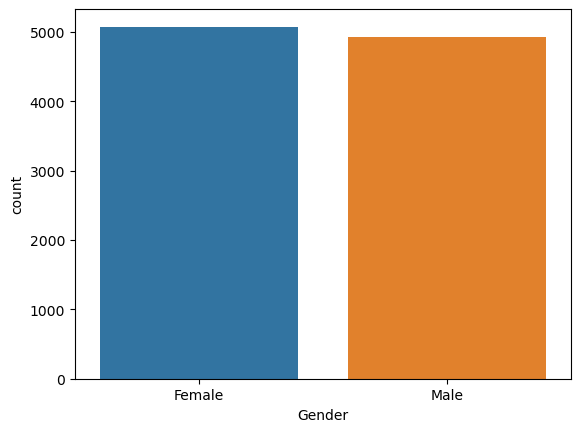

In [11]:
# Distribution of Gender in our Data
sns.countplot(data=df, x='Gender')

In [12]:
df['Hospital'].value_counts()

Smith PLC                        19
Smith and Sons                   17
Smith Ltd                        14
Smith Inc                        14
Johnson PLC                      13
                                 ..
Daniel-Benton                     1
Franco, Hicks and Anderson        1
Berry PLC                         1
Martinez, Johnson and Carlson     1
Torres, Young and Stewart         1
Name: Hospital, Length: 8639, dtype: int64

<Axes: xlabel='Medical Condition', ylabel='count'>

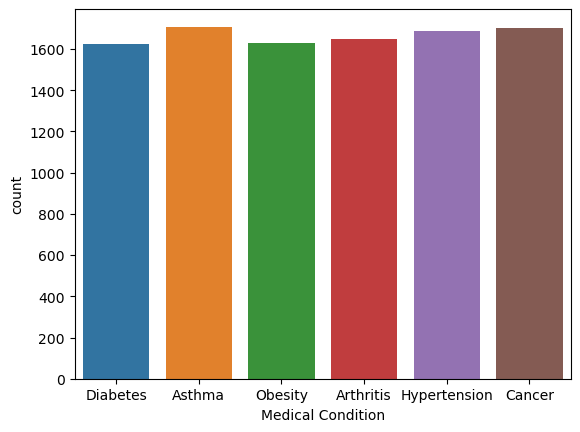

In [13]:
# What are the major diseases people have in our dataset
sns.countplot(data=df, x='Medical Condition')

## So, most of our patients are suffering from Asthma, followed by cancer

In [14]:
hasta= df.groupby(['Name','Age'])['Medical Condition'].agg(set).reset_index()

# Filter patients with multiple medical conditions
birdan_fazla_hastalik = hasta[hasta['Medical Condition'].apply(len) > 1]
print('Birdan falza hasta olan kisiler :')
print(birdan_fazla_hastalik)

Birdan falza hasta olan kisiler :
                   Name  Age         Medical Condition
1622  Charles Hernandez   78  {Hypertension, Diabetes}
2433       David Garcia   60    {Hypertension, Asthma}
3004    Elizabeth Jones   70         {Obesity, Cancer}
4649        John Miller   50     {Arthritis, Diabetes}
5833        Laura Jones   77   {Obesity, Hypertension}
5991      Linda Johnson   58       {Cancer, Arthritis}
7074  Michelle Williams   60  {Hypertension, Diabetes}


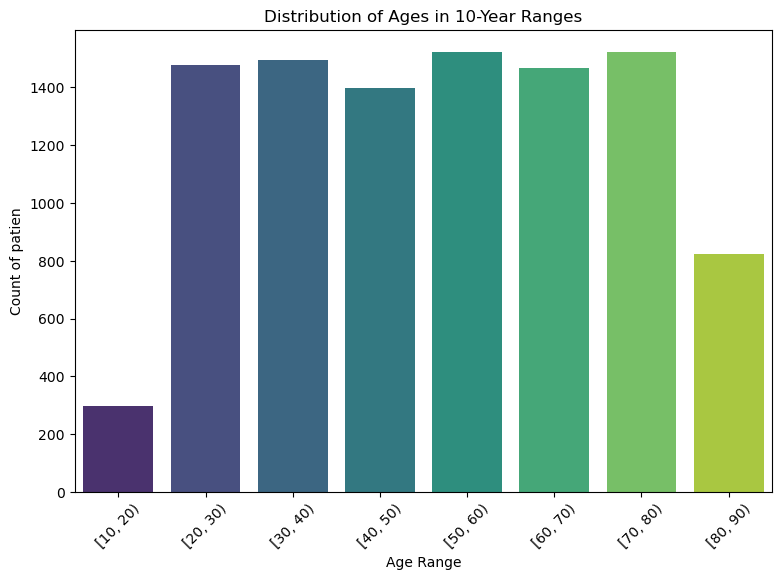

In [15]:
# Yaş Dağılımı
# Age Distribution
age_ranges = pd.cut(df['Age'], bins=range(10, 100, 10), right=False)

# Create a histogram for the distribution of age ranges
plt.figure(figsize=(9, 6))
sns.countplot(x=age_ranges, data=df, palette='viridis')
plt.title('Distribution of Ages in 10-Year Ranges')
plt.xlabel('Age Range')
plt.ylabel('Count of patien')
plt.xticks(rotation=45)
plt.show();

<Axes: xlabel='Blood Type', ylabel='count'>

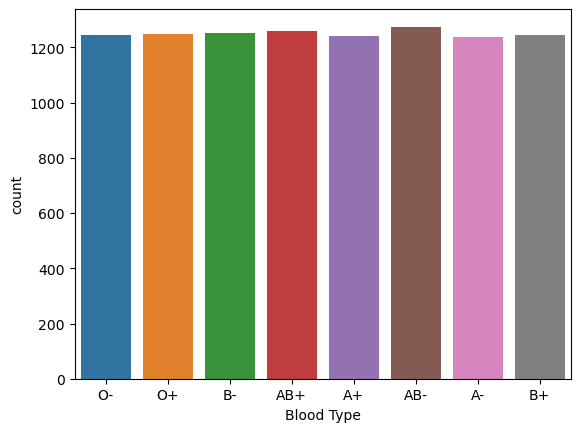

In [16]:
# Distribution of different blood groups

sns.countplot(x='Blood Type', data=df)

In [30]:
#df['Blood Type'].value_counts()
df['Medical Condition'].unique()

array(['Diabetes', 'Asthma', 'Obesity', 'Arthritis', 'Hypertension',
       'Cancer'], dtype=object)

In [18]:
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


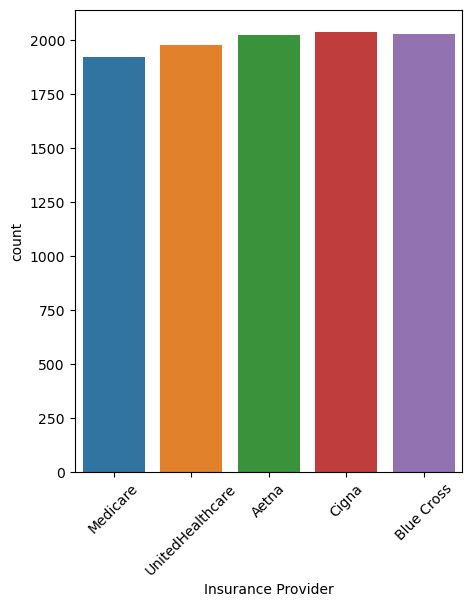

In [19]:
# Insurance provider distribution
plt.figure(figsize=(5,6))
sns.countplot(data=df, x='Insurance Provider')
plt.xticks(rotation=45)
plt.show()

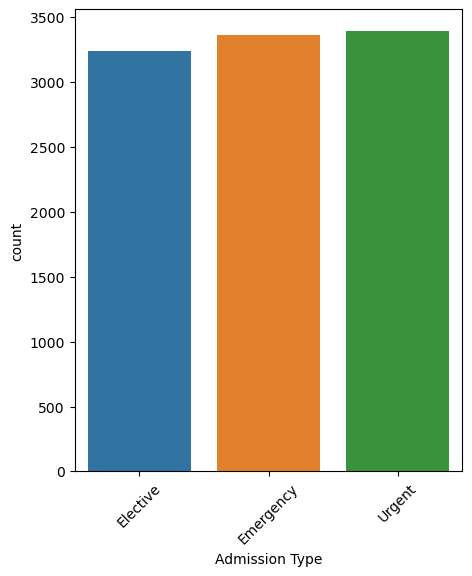

In [20]:
# Admission Type distribution

plt.figure(figsize=(5,6))
sns.countplot(data=df, x='Admission Type')
plt.xticks(rotation=45)
plt.show()

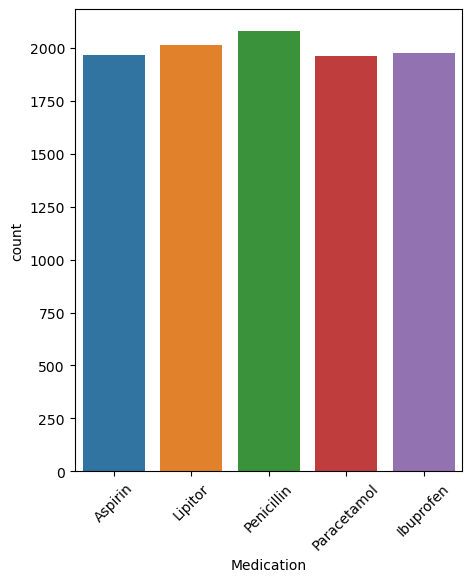

In [21]:
# Medication distribution

plt.figure(figsize=(5,6))
sns.countplot(df, x='Medication')
plt.xticks(rotation=45)
plt.show()

In [22]:
df.groupby('Name').aggregate({'Age':'mean', 'Billing Amount':'min'})

,Age,Billing Amount
Name,,
Aaron Burnett,54.0,7531.642746
Aaron Calderon,35.0,47555.486731
Aaron Coleman,69.0,46762.663205
Aaron Daugherty,34.0,30468.487108
Aaron Davis,22.0,17930.743019
...,...,...
Zachary Wood,36.0,7154.956700
Zachary Yates,37.0,5937.256092
Zoe Adkins DVM,30.0,13133.514334


In [23]:
df.head(2)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal


In [24]:
df.groupby('Hospital')['Doctor'].sum().reset_index()

,Hospital,Doctor
0,Abbott Inc,Jon Robinson
1,Abbott LLC,Karen WilliamsAngela Walton
2,Abbott PLC,Jimmy Hughes
3,"Abbott, Curry and Moore",Robert Burns
4,Abbott-Jordan,Justin Levine
...,...,...
8634,"Zimmerman, Salinas and Hill",Jacob Olson
8635,Zuniga Ltd,Sabrina Brown
8636,"Zuniga, Taylor and Scott",Charles Patel
8637,Zuniga-Chandler,Richard Bryant


In [25]:
df[df['Hospital'] == 'Smith PLC']

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
1563,Teresa Coleman,85,Male,B+,Obesity,2021-11-04,Heidi Allen,Smith PLC,Blue Cross,18562.037226,268,Urgent,2021-12-03,Penicillin,Normal
2968,Angel Grant,37,Female,A-,Diabetes,2020-04-13,Jonathan Moss,Smith PLC,UnitedHealthcare,9293.500282,201,Emergency,2020-05-05,Paracetamol,Inconclusive
3763,Karen Wade,18,Male,B+,Obesity,2021-04-07,Douglas Carter,Smith PLC,Medicare,32760.415636,156,Elective,2021-05-01,Penicillin,Abnormal
3953,Robert Hayes,78,Male,A+,Asthma,2021-05-26,Mr. Johnny Edwards MD,Smith PLC,Aetna,7144.127418,138,Urgent,2021-06-15,Penicillin,Abnormal
4566,Alexander Navarro,25,Female,B-,Hypertension,2020-09-03,Trevor Faulkner,Smith PLC,Blue Cross,38719.152557,187,Emergency,2020-09-07,Penicillin,Abnormal
4738,Erin Bond,78,Male,B-,Cancer,2019-01-14,Emily Stone,Smith PLC,Blue Cross,39685.206605,480,Elective,2019-02-07,Ibuprofen,Inconclusive
5004,Anita Hill,54,Male,O-,Hypertension,2023-08-27,Ryan Johnson,Smith PLC,UnitedHealthcare,19238.819248,367,Urgent,2023-09-11,Penicillin,Normal
5157,Sean Brown,58,Male,O+,Arthritis,2020-12-26,Jennifer Montgomery,Smith PLC,Medicare,30424.246708,163,Elective,2020-12-27,Aspirin,Normal
5289,Kimberly Adams,19,Male,A+,Arthritis,2023-06-03,James Barrera,Smith PLC,Blue Cross,7280.258731,121,Urgent,2023-06-09,Lipitor,Abnormal
5390,Lisa Alvarado,81,Male,B-,Hypertension,2023-10-14,Tina Chavez,Smith PLC,UnitedHealthcare,38851.273553,134,Emergency,2023-10-29,Aspirin,Inconclusive


In [26]:
df.Hospital.value_counts()

Smith PLC                        19
Smith and Sons                   17
Smith Ltd                        14
Smith Inc                        14
Johnson PLC                      13
                                 ..
Daniel-Benton                     1
Franco, Hicks and Anderson        1
Berry PLC                         1
Martinez, Johnson and Carlson     1
Torres, Young and Stewart         1
Name: Hospital, Length: 8639, dtype: int64